# 1.올바른 시간 데이터 순서 확인

In [21]:
import pandas as pd

file_path = r'D:\MusicTrendAnalysis\data\daegeun_time_data.csv'
data = pd.read_csv(file_path)

data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by='date').reset_index(drop=True)

print(data.head())

   Unnamed: 0       date  Rank   Runtime  Weekly Views   n_score  g_score  \
0           0 2023-09-24     1 -0.733963      2.119452  0.942971     1.00   
1         123 2023-09-24   130  1.052141     -1.011885  0.104623     0.03   
2         124 2023-09-24   131  0.947076      0.413551  0.509538     0.30   
3         125 2023-09-24   132 -1.338086     -0.282185  0.496288     0.15   
4         126 2023-09-24   133 -0.024775      0.127099  0.250688     0.10   

   ky_chart_on  KoreanMovies  Dance  ...  Ballad  Soul  Rock  Pop  \
0            0             0      1  ...       0     0     0    0   
1            1             0      0  ...       1     0     0    0   
2            0             0      0  ...       0     0     1    0   
3            0             0      0  ...       0     0     0    1   
4            0             0      0  ...       0     0     1    0   

   season_autumn  season_spring  season_summer  season_winter  Previous_Rank  \
0              1              0           

# 2.지연기능 생성

In [22]:
lag_features = ['Rank', 'Weekly Views', 'n_score', 'g_score']

for feature in lag_features:
    data[f'{feature}_lag_1'] = data[feature].shift(1)
    data[f'{feature}_lag_2'] = data[feature].shift(2)
    data[f'{feature}_lag_3'] = data[feature].shift(3)

data = data.dropna().reset_index(drop=True)

print(data[['date', 'Rank', 'Rank_lag_1', 'Rank_lag_2', 'Rank_lag_3']].head())

        date  Rank  Rank_lag_1  Rank_lag_2  Rank_lag_3
0 2023-09-24   132       131.0       130.0         1.0
1 2023-09-24   133       132.0       131.0       130.0
2 2023-09-24   134       133.0       132.0       131.0
3 2023-09-24   135       134.0       133.0       132.0
4 2023-09-24   136       135.0       134.0       133.0


In [23]:
data[['Rank_lag_1', 'Rank_lag_2', 'Rank_lag_3']].describe()

,Rank_lag_1,Rank_lag_2,Rank_lag_3
count,9840.000000,9840.000000,9840.000000
mean,100.007724,100.016159,100.008943
std,57.996880,57.995206,58.003108
min,1.000000,1.000000,1.000000
25%,49.000000,49.000000,49.000000
50%,100.000000,100.000000,100.000000
75%,150.000000,150.000000,150.000000
max,200.000000,200.000000,200.000000


# 3.데이터 정규화

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['Weekly Views', 'n_score', 'g_score', 
                        'Rank_lag_1', 'Rank_lag_2', 'Rank_lag_3']

data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

print(data[columns_to_normalize].head())

   Weekly Views   n_score  g_score  Rank_lag_1  Rank_lag_2  Rank_lag_3
0      0.102222  0.496288     0.15    0.653266    0.648241    0.000000
1      0.159557  0.250688     0.10    0.658291    0.653266    0.648241
2      0.171645  0.633998     0.10    0.663317    0.658291    0.653266
3      0.000000  0.053410     0.04    0.668342    0.663317    0.658291
4      0.199686  0.509538     0.30    0.673367    0.668342    0.663317


In [4]:
data.head()

,Unnamed: 0,date,Rank,Runtime,Weekly Views,n_score,g_score,ky_chart_on,KoreanMovies,Dance,...,Rank_lag_3,Weekly Views_lag_1,Weekly Views_lag_2,Weekly Views_lag_3,n_score_lag_1,n_score_lag_2,n_score_lag_3,g_score_lag_1,g_score_lag_2,g_score_lag_3
0,125,2023-09-24,132,-1.338086,0.102222,0.496288,0.15,0,0,0,...,0.000000,0.413551,-1.011885,2.119452,0.509538,0.104623,0.942971,0.30,0.03,1.00
1,126,2023-09-24,133,-0.024775,0.159557,0.250688,0.10,0,0,0,...,0.648241,-0.282185,0.413551,-1.011885,0.496288,0.509538,0.104623,0.15,0.30,0.03
2,127,2023-09-24,134,-0.550099,0.171645,0.633998,0.10,0,0,0,...,0.653266,0.127099,-0.282185,0.413551,0.250688,0.496288,0.509538,0.10,0.15,0.30
3,128,2023-09-24,135,-0.733963,0.000000,0.053410,0.04,0,0,0,...,0.658291,0.213386,0.127099,-0.282185,0.633998,0.250688,0.496288,0.10,0.10,0.15
4,129,2023-09-24,136,-0.051041,0.199686,0.509538,0.30,0,0,0,...,0.663317,-1.011885,0.213386,0.127099,0.053410,0.633998,0.250688,0.04,0.10,0.10


In [32]:
data

,Unnamed: 0,date,Rank,Runtime,Weekly Views,n_score,g_score,ky_chart_on,KoreanMovies,Dance,...,Rank_lag_3,Weekly Views_lag_1,Weekly Views_lag_2,Weekly Views_lag_3,n_score_lag_1,n_score_lag_2,n_score_lag_3,g_score_lag_1,g_score_lag_2,g_score_lag_3
0,125,2023-09-24,132,-1.338086,-0.282185,0.496288,0.15,0,0,0,...,1.0,0.413551,-1.011885,2.119452,0.509538,0.104623,0.942971,0.30,0.03,1.00
1,126,2023-09-24,133,-0.024775,0.127099,0.250688,0.10,0,0,0,...,130.0,-0.282185,0.413551,-1.011885,0.496288,0.509538,0.104623,0.15,0.30,0.03
2,127,2023-09-24,134,-0.550099,0.213386,0.633998,0.10,0,0,0,...,131.0,0.127099,-0.282185,0.413551,0.250688,0.496288,0.509538,0.10,0.15,0.30
3,128,2023-09-24,135,-0.733963,-1.011885,0.053410,0.04,0,0,0,...,132.0,0.213386,0.127099,-0.282185,0.633998,0.250688,0.496288,0.10,0.10,0.15
4,129,2023-09-24,136,-0.051041,0.413551,0.509538,0.30,0,0,0,...,133.0,-1.011885,0.213386,0.127099,0.053410,0.633998,0.250688,0.04,0.10,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,9717,2024-09-08,70,0.106557,1.751208,0.588270,0.08,0,0,1,...,67.0,-0.451816,0.319801,3.452941,0.400250,0.165637,0.877328,0.04,0.03,0.96
9836,9718,2024-09-08,71,-1.285554,1.309470,0.293608,0.18,0,0,0,...,68.0,1.751208,-0.451816,0.319801,0.588270,0.400250,0.165637,0.08,0.04,0.03
9837,9719,2024-09-08,72,-1.259288,-0.317271,0.148950,0.36,0,0,1,...,69.0,1.309470,1.751208,-0.451816,0.293608,0.588270,0.400250,0.18,0.08,0.04
9838,9696,2024-09-08,47,-0.129839,3.452941,0.877328,0.73,0,0,0,...,70.0,-0.317271,1.309470,1.751208,0.148950,0.293608,0.588270,0.36,0.18,0.08


# 4.LSTM모델 구축 및 교육

Epoch 1/50


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 12836.5576 - val_loss: 10133.3691
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9610.9385 - val_loss: 8523.6123
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8023.7280 - val_loss: 7342.5537
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6838.0356 - val_loss: 6397.1689
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6192.6128 - val_loss: 5547.6348
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5171.0356 - val_loss: 4711.5776
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4476.1606 - val_loss: 4062.6472
Epoch 8/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3843.4460 - val_loss: 3506.5801
Epoch 9/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3275.0139 - val_loss: 3026.9841
Epoch 10/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2833.3877 - val_loss: 2611.8281
Epoch 11/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2471.8867 - val_loss: 2253.

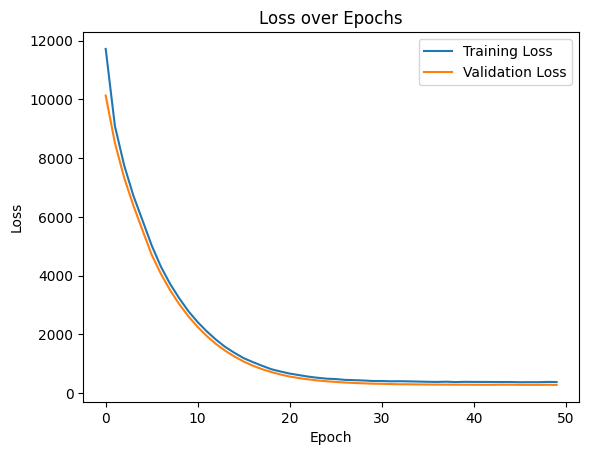

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Prepare the data for the LSTM model
# Define the input features and the target variable (Rank)
features = ['Weekly Views', 'n_score', 'g_score', 'Rank_lag_1', 'Rank_lag_2', 'Rank_lag_3']
target = 'Rank'

# Split data into input (X) and output (y)
X = data[features].values
y = data[target].values

# Reshape the input to be 3D for LSTM: (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 1 timestep for each input sample

X_train = X[:-500]
y_train = y[:-500]

X_test = X[-500:]
y_test = y[-500:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))  # Adding dropout to prevent overfitting
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [33]:
X_train[:10]

array([[[0.10222187, 0.49628826, 0.15      , 0.65326633, 0.64824121,
         0.        ]],

       [[0.15955747, 0.2506876 , 0.1       , 0.65829146, 0.65326633,
         0.64824121]],

       [[0.17164526, 0.63399816, 0.1       , 0.66331658, 0.65829146,
         0.65326633]],

       [[0.        , 0.05340962, 0.04      , 0.66834171, 0.66331658,
         0.65829146]],

       [[0.1996859 , 0.50953787, 0.3       , 0.67336683, 0.66834171,
         0.66331658]],

       [[0.43866148, 0.94297117, 1.        , 0.67839196, 0.67336683,
         0.66834171]],

       [[0.17327831, 0.69877538, 0.13      , 0.68341709, 0.67839196,
         0.67336683]],

       [[0.        , 1.        , 1.        , 0.68844221, 0.68341709,
         0.67839196]],

       [[0.12599421, 0.07933242, 0.23      , 0.64321608, 0.68844221,
         0.68341709]],

       [[0.08439764, 0.3092176 , 0.02      , 0.69346734, 0.64321608,
         0.68844221]]])

# 5.모델 평가 및 예측하기

In [6]:
rank_scaler = MinMaxScaler()

data['Rank'] = rank_scaler.fit_transform(data[['Rank']])

columns_to_normalize = ['Weekly Views', 'n_score', 'g_score', 'Rank_lag_1', 'Rank_lag_2', 'Rank_lag_3']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


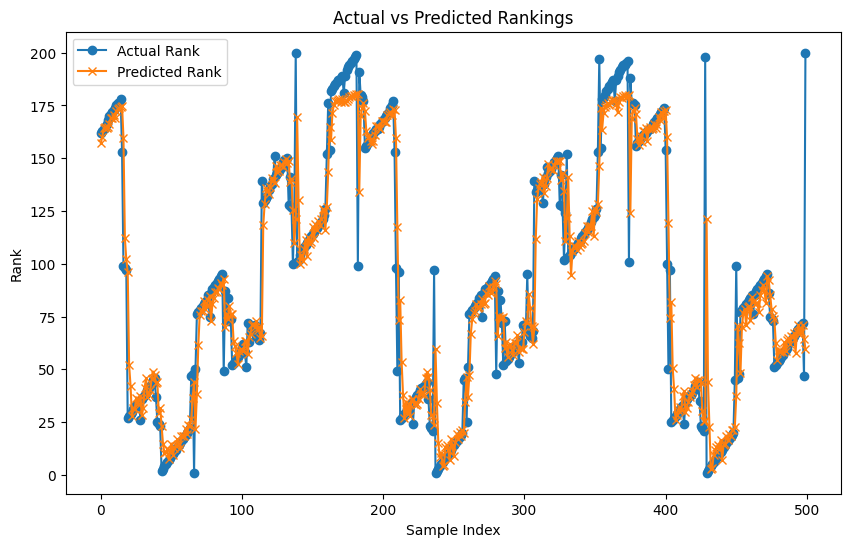

In [8]:
# Make predictions on the training set (or use a test set if available)
predictions = model.predict(X_test)

# Rescale the predictions back to the original scale (if you used MinMaxScaler)

# Compare predicted rankings with actual rankings
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.reshape(-1, 1), label='Actual Rank', marker='o')  
# Actual rankings (first 100 data points)
plt.plot(predictions, label='Predicted Rank', marker='x')  
# Predicted rankings (first 100 data points)
plt.xlabel('Sample Index')
plt.ylabel('Rank')
plt.title('Actual vs Predicted Rankings')
plt.legend()
plt.show()


# 6.하이퍼 파라미터 튜닝 구현

Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 13008.2119 - val_loss: 11141.4873
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10399.3682 - val_loss: 9650.6045
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9392.1514 - val_loss: 8719.4307
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8349.2939 - val_loss: 7952.2651
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7702.5444 - val_loss: 7288.8901
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7082.0513 - val_loss: 6705.8604
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6437.0449 - val_loss: 6184.1221
Epoch 8/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6049.8779 - val_loss: 5681.4268
Epoch 9/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5548.7632 - val_loss: 5123.8218
Epoch 10/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4869.2856 - val_loss: 4655.6099
Epoch 11/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4402.6899 - val_

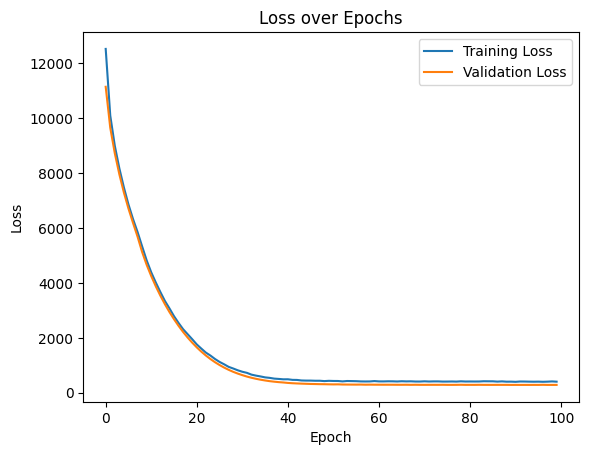

In [11]:
from tensorflow.keras.optimizers import Adam

def build_lstm_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer for Rank prediction

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

# Set hyperparameters
units = 60
dropout_rate = 0.3
learning_rate = 0.0005
batch_size = 32
epochs = 100

# Build and compile the model
model = build_lstm_model(units=units, dropout_rate=dropout_rate, learning_rate=learning_rate)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Plot the loss history to visualize training progress
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 7. 모델 예측 및 비교 및 비교

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


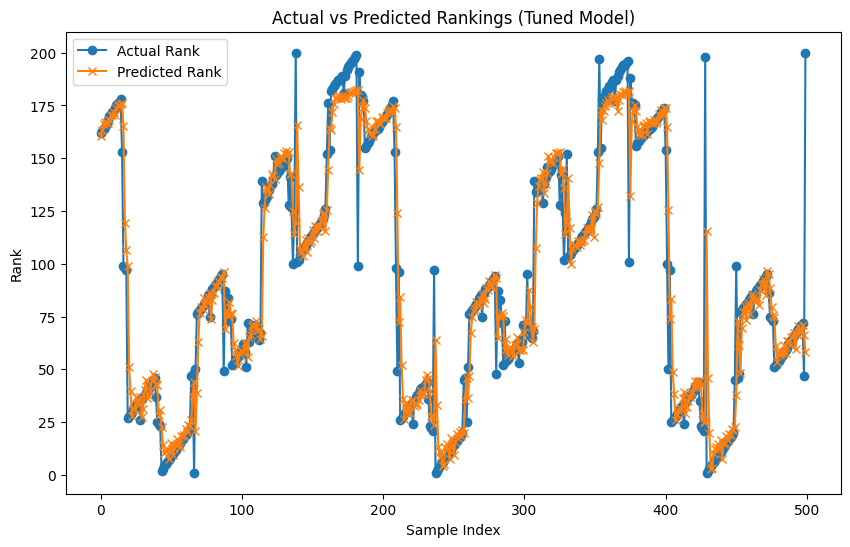

In [12]:
# Make predictions with the tuned model
predictions = model.predict(X_test)

# Inverse transform the predicted Rank values

# Compare the predicted rankings with actual rankings
plt.figure(figsize=(10, 6))
plt.plot(y_test.reshape(-1, 1), label='Actual Rank', marker='o')  # Actual rankings (first 100 data points)
plt.plot(predictions, label='Predicted Rank', marker='x')  # Predicted rankings (first 100 data points)
plt.xlabel('Sample Index')
plt.ylabel('Rank')
plt.title('Actual vs Predicted Rankings (Tuned Model)')
plt.legend()
plt.show()

# 10.최적의 하이퍼파라미터로 최종 모델 학습

Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12416.3262 - val_loss: 9652.8145
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8948.2451 - val_loss: 7900.7754
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7434.6445 - val_loss: 6641.2231
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6352.6362 - val_loss: 5637.4180
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5230.4731 - val_loss: 4636.3921
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4448.8027 - val_loss: 3882.0842
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3704.0056 - val_loss: 3262.5364
Epoch 8/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3178.2092 - val_loss: 2745.0090
Epoch 9/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2581.1328 - val_loss: 2312.7239
Epoch 10/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2196.1838 - val_loss: 1949.0304
Epoch 11/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1868.7214 - val_lo

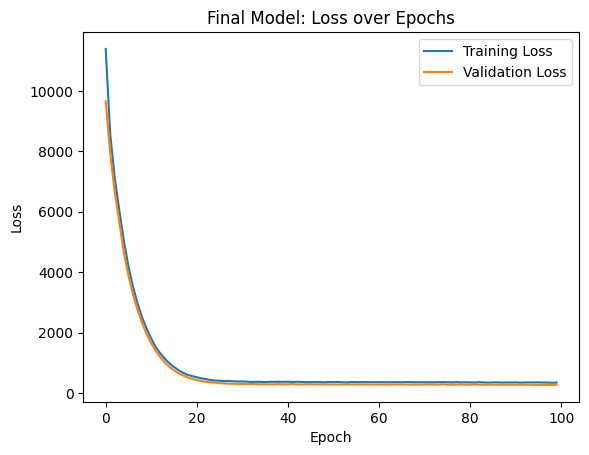

In [13]:
# 스텝 3

# Extract the best hyperparameters
best_params = {'units': 60, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'val_loss': 0.007861444726586342}
best_units = best_params['units']
best_dropout = best_params['dropout_rate']
best_learning_rate = best_params['learning_rate']
best_batch_size = best_params['batch_size']

# Train the final model with optimal hyperparameters
final_model = build_lstm_model(units=best_units, dropout_rate=best_dropout, learning_rate=best_learning_rate)
history = final_model.fit(X_train, y_train, epochs=epochs, batch_size=best_batch_size, validation_split=0.2)

# Plot the final model's training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Final Model: Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# 11.최적의 하이퍼파라미터를 사용하여 모델 재교육

Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12455.4863
Epoch 2/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8479.9189
Epoch 3/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6751.4233
Epoch 4/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5380.3052
Epoch 5/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4408.4258
Epoch 6/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3400.6614
Epoch 7/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2810.7424
Epoch 8/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2280.1995
Epoch 9/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1806.5640
Epoch 10/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1481.7820
Epoch 11/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1285.0906
Epoch 12/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1038.7714
Epoch 13/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 843.7970
Epoch 14/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 719.5299
Epoch 15/100
2

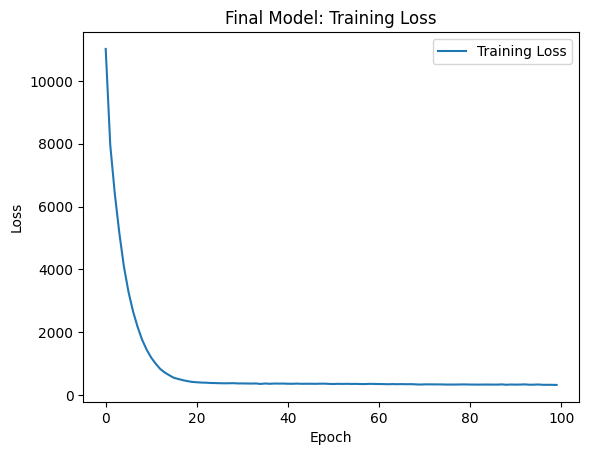

In [14]:
# Build the final model with optimal hyperparameters
final_model = build_lstm_model(units=60, dropout_rate=0.2, learning_rate=0.001)

# Train the model on the entire dataset (no validation split)
final_history = final_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Plot the training loss to verify training stability
plt.plot(final_history.history['loss'], label='Training Loss')
plt.title('Final Model: Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# 12.테스트 데이터에 대한 예측하기

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


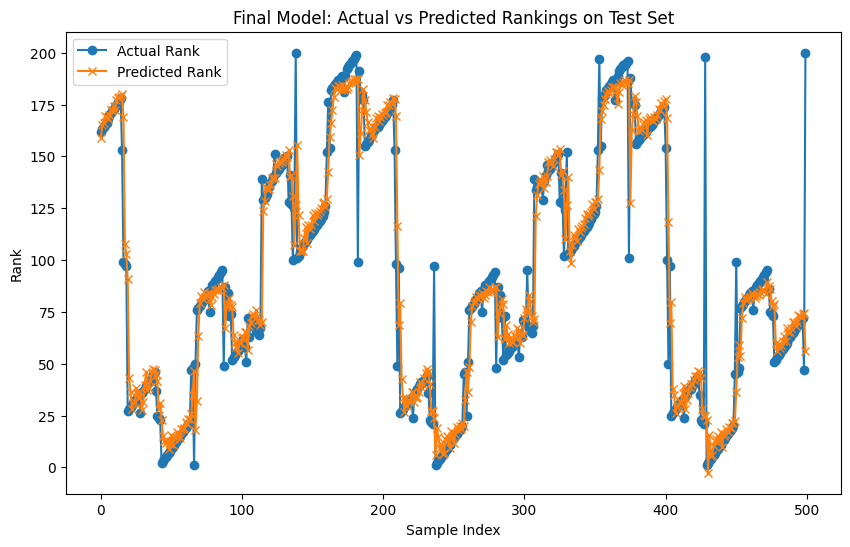

In [15]:
# Assuming you have test data (replace this with your actual test dataset)
# Preprocess test data in the same way as training data
# test_X = preprocess_test_data(test_data)

# Make predictions on the test set
test_predictions = final_model.predict(X_test)  # Replace 'X' with your test data 'test_X'


# Compare predicted and actual rankings on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.reshape(-1, 1), label='Actual Rank', marker='o')  # Actual rankings (first 100 data points)
plt.plot(test_predictions, label='Predicted Rank', marker='x')  # Predicted rankings (first 100 data points)
plt.xlabel('Sample Index')
plt.ylabel('Rank')
plt.title('Final Model: Actual vs Predicted Rankings on Test Set')
plt.legend()
plt.show()

# 13. 모델 성능 및 평가

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test.reshape(-1, 1), test_predictions)
mae = mean_absolute_error(y_test.reshape(-1, 1), test_predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 359.8829589547126
Root Mean Squared Error (RMSE): 18.970581407925078
Mean Absolute Error (MAE): 9.242113136291504


In [26]:
final_model.save('lstm_model.keras')